<a href="https://colab.research.google.com/github/unmentioned/UTS_ML2019_ID97114033/blob/master/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

For this report, a simple Support Vector Machine Algorithm will be implemented and tested. This algorithm will be able to classify a given data set into two classifications as per the main strengths of using a Support vector machine. As such, this implementation will not include multi class classification nor will it be able to solve non-linear separable datasets. 



# Algorithm Input / Output
## Input:
The algorithm will accept a dictionary of two keys. A 1 and an -1 where the value is an array of arrays which consist of 2 integer values (x and y coordinate) . As per the constraints of a linear Support Vector Machine, the training set must not contain any values that aren’t linearly possible.

## Output:
The algorithm will be built as a class which will include different methods to output the data. The prediction method will return an array of the input values inside an array with its classification added. For more visual results, a method is defined to plot the data into a graph with an option to include or exclude the training set.


In [0]:
# Example of input and output data
inputDataTraining = {
1: [[2,3],[4,3],[3,4],[2,1]],
-1: [[-2,-3],[-2,-5],[-5,-3],[-5,-3]],
}

InputDataPrediction = [
    [2,3],
    [4,3],
    [3,4],
    [2,1]
]

OutputData = [
    [[-1,-3],-1],
    [[1,2],1],
    [[3,4],1],
    [[-5,-4],-1]
]

# Exploration
## Data Structure Design
To implement the data structure for this algorithm a class will be used to define the entire algorithm where the core logic will be logically separated into different functions and methods. As this algorithm is relatively simple, there isn’t too many functions aside from a few vital functions.

### Class SVM
Contains all the functions related to the implementation of this algorithm

### trainModel
**Parameters**:

*InputData: Dictionary*

**Return**:
None

Contains the code to train the model, requires the training data to begin training. This function will accept a dictionary of two keys which are 1 and -1. These values are essentially the classification values. The two keys holds an array of arrays. See code example above for exact data structure.

### predictModel
**Parameters**:

*InputData: Array*

**Return**:
Array

Contains the code to classify the input data into their respective classifications, returns the input data set, with a classification for each element.

### plotGraph
**Parameters**:

*omitTraining: Boolean*

**Return**:
None

Purely for visually representing the training, prediction and hyperplanes. Also takes in an optional parameter to not plot the training data points into the graph


## Data Model
For an SVM, the main concept is to define a hyperplane from the feature space which can linearly separate the two dataset classifications. This is based on the formula f(x) = wx + b, where w is the norm, x is the feature vector and b is the bias. As we are dealing with vectors, the data model should be iterable and can contain values(the x and y values). As such it is best to use a array of array to store the data set of vectors for the training and prediction set, as there is no advantage in using a dictionary key over a an array index. 

For the training set, a dictionary will be useful for assigning each classification a key, where its value will be an array of values under the respective classification.



# Data Methodology

CPU times: user 53.5 ms, sys: 35 ms, total: 88.5 ms
Wall time: 45.3 ms


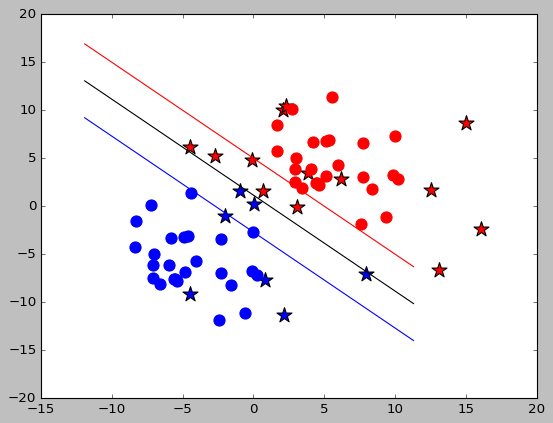

In [106]:
import matplotlib.pyplot as pit
from matplotlib import style
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
style.use('classic')



#Define the SVM class
class SVM:
	
    #Initialize some class variables
    def __init__(self,visualization=True):
        self.visualization = visualization
        self.colors = {1:'r',-1:'b'}
        if self.visualization:
            self.fig = pit.figure()
            self.ax = self.fig.add_subplot(1,1,1)
       
    #Training method
    #Main goal of this method is to find wx + b
    def trainModel(self,trainingData):
        self.data = trainingData
    
    # { ||w||:[w,b]}
        wMagnitude = {}
        transforms = [
            [1,1],
            [-1,1],
            [-1,-1],
            [1,-1]
        ]
    
        allData = []
        # Convert dictionary to an array to find largest feature value and smallest feature value
        for yi in self.data:
            for featureSet in self.data[yi]:
                for feature in featureSet:
                    allData.append(feature)
          
        #Optimize the algorithm by limiting the data range to these boundaries
        self.maxFeatureValue = max(allData)
        self.minFeatureValue = min(allData)
    
        stepSizes = [self.maxFeatureValue * 0.1,
              self.maxFeatureValue * 0.01,
              self.maxFeatureValue * 0.001]
    
        RangeMultiple = 5
        
        multiple = 5
        latestOptimum = self.maxFeatureValue*10
    
        for step in stepSizes:
            w = np.array([latestOptimum,latestOptimum])
            optimized = False 
            while not optimized:
                for b in np.arange(-1*(self.maxFeatureValue*RangeMultiple),
                                   self.maxFeatureValue*RangeMultiple,
                                   step*multiple):
                    for transformation in transforms:
                        w_t = w*transformation
                        found_option = True
                        for i in self.data:
                            for xi in self.data[i]:
                                yi = i
                                
                                # Stop execution here as data set is not linearly seperable
                                if not yi*(np.dot(w_t,xi)+b) >= 1:
                                    found_option = False
                                    # Could potentially add kernel function here in the future
                                    break;
                        if found_option:
                            # Caculate Vector magnitude
                            wMagnitude[np.linalg.norm(w_t)] = [w_t,b]

                if w[0] < 0:
                    optimized = True
                else:
                    w = w - step
            norms = sorted([n for n in wMagnitude])
            opt_choice = wMagnitude[norms[0]]
            self.w = opt_choice[0]
            self.b = opt_choice[1]
            latestOptimum = opt_choice[0][0]+ step*2      
      
    # Method to perform prediction on dataset
    def predictModel(self,predictionData):
        result = [];

        #Iterate through each feature
        for i in predictionData:
            #Get the sign of the dot product between the feature and decision bounrdary vector
            classification = np.sign(np.dot(np.array(i),self.w)+self.b)
            if classification !=0 and self.visualization:
                self.ax.scatter(i[0], i[1], s=200,marker='*',c=self.colors[classification])
                #Appends the current feature space and its classification to result array
                result.append([i,classification])
        # Return dataset with classification
        return result

       #Method to plot the values and hyper planes
    def plotGraph(self,omitTraining=False):
        if not omitTraining:
            for i in trainingSet:
                for x in trainingSet[i]:
                    self.ax.scatter(x[0],x[1],s=100,color=self.colors[i])
        
        #Plots 3 hyperplanes, the decision boundary as well as the lower and upper margin

        #Simple function to just calculate the hyperplane values
        def hyperplane(x,w,b,v):
            return (-w[0]*x-b+v) / w[1]
        hyp_x_min = self.minFeatureValue
        hyp_x_max = self.maxFeatureValue

        
        # Plots the upper / positive hyperplane
        psv1 = hyperplane(hyp_x_min, self.w,self.b, 1)
        psv2 = hyperplane(hyp_x_max, self.w,self.b, 1)
        self.ax.plot([hyp_x_min,hyp_x_max],[psv1,psv2],color='red')
        
        # Plots the lower / negative hyperplane
        nsv1 = hyperplane(hyp_x_min, self.w,self.b, -1)
        nsv2 = hyperplane(hyp_x_max, self.w,self.b, -1)
        self.ax.plot([hyp_x_min,hyp_x_max],[nsv1,nsv2],color='blue')

        # Plots the Decision boundary
        db1 = hyperplane(hyp_x_min, self.w,self.b, 0)
        db2 = hyperplane(hyp_x_max, self.w,self.b, 0)
        self.ax.plot([hyp_x_min,hyp_x_max],[db1,db2],color='black')

        pit.show()
    
# Standard deviation for trainingSet
# Do not set higher than 4 as this could cause cluster to overlap
clustersDeviation = [3]

n_samples = 50

# Create two blobs for each classification
Xn,yn = make_blobs(n_samples=int(float(n_samples/2)), cluster_std=clustersDeviation, centers=[(-5,-5)] ,n_features=1,random_state=1)
Xp,yp = make_blobs(n_samples=int(float(n_samples/2)), cluster_std=clustersDeviation, centers=[(5,5)] ,n_features=1,random_state=1)

# Aggregate blobs into a dictionary for training
trainingSet = {
    -1:Xn,
    1:Xp
}

svm = SVM()
svm.trainModel(trainingData=trainingSet)

# create prediction dataset 
predictionSet, y = make_blobs(n_samples=20, cluster_std=6, centers=[(0,0)])

# Start Prediction
%time svm.predictModel(predictionSet)

svm.plotGraph(omitTraining=False)




# Evaulation
From executing the above code, the graph produced shows that the hyperplane is correctly classifying each prediction feature to its classification. In cases where the training data set is not linearly seperable, the code will fail as intended. 


## Training Time Performance
A common disadvantage of SVM's is the long training times for large datasets. Below are the results of running this algorithm over different sample sizes(Note that below times are the result of only training).


* Sample Size: Time
*   10 : 4.35s
*   50: 15.6s
*   100: 29.5s
*   200: 55.9s
*   500: 3min 50s
*   1000: 6min 43s

Each result was ran 3 times where the above results are the average. As seen from the above results, as the dataset increases the training time increases quite heavily. As such this algorithm should not be used for larger datasets.
    


## Prediction Time Performance
Although the training time is very poor as the data set size increases, a SVM has the advnatage of having fast prediction times. As the SVM already knows the value of w and b, the result is simply a matter of performing a dot product on each sample. The below results are a result of timing the prediction function with varying sample sizes.

* Sample Size: Time
*   10: 28.1ms
*   50: 150ms
*   100: 270ms
*   200: 463ms
*   500: 1.48s
*   1000: 2.57s

As seen from the above result, the time performance of prediction is much more consistent in performance than the training time. 

![alt text](https://docs.google.com/uc?export=download&id=1B08ZdAYqKPFJDxwNPmsbq_IztbhFAX9F)

# Conclusion
In conclusion to this report, the SVM's implmentation behaved as expected in terms of performance where training time was quite long compared to the prediction processing. However, there are several improvements that could be made to improve this algorithm, as currently, this algorithm cannot solve linearly inseperable problems. In the future, this aglorithm could be expanded to solve non-linear problems by utilising Kernel functions. 

Additionally the algorithm could be further improved by the use soft margins instead of hard margins. As hard margins cause the aglorithm to fail when there is at least one error or outlier, the use of soft margins could potentially allow the algorithm to continue the training process with some tolerance for errors.

# Ethical

As SVM has quite a few applications in the world today, this also leads to some ethical issues as to its use. Some of the popular uses of SVM's include face detection, handwriting recognition and bioinformatics. While the SVM or machine learning in general does not pose any ethical/moral concerns, its use for different applications may pose some serious concerns particularly on privacy. 

A particular problem with the SVM is that fact that it is considered a "black box" machine learning algorithm. As a SVM can quite potentially work on multiple dimensions which makes understanding the internal workings extremely difficult, whereas a decision tree is straightforward. Because an SVM obfuscates its internal processing, this could cause potential problems when the process needs to be understood. For example, a SVM could misclassify a person for a specific disease or genome. As misdiagnosis is a fairly serious ordeal this prompts the question whether the agorithm is at fault which can't be found due to its obfuscation.

Although it is not known if the particular machine learning algorithm was an SVM or not, there was a case where Google images, image recognition algorithm mistakingly classified Africans as "Gorillas". This is an example of how a mistake in a machine learning algorithm can unintentially cause public outrage.

# Links
### Youtube
URL: https://youtu.be/A-dcl6CH394 

plainText: `https://youtu.be/A-dcl6CH394`

### Github/Colab: 

https://github.com/unmentioned/UTS_ML2019_ID97114033/blob/master/Assignment2.ipynb 

`https://github.com/unmentioned/UTS_ML2019_ID97114033/blob/master/Assignment2.ipynb`